In [1]:
import pandas as pd
import numpy as np
import os
import cmath 
import skrf as rf
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import ttk


In [2]:
mdf_file_path ='C:/Users/Dell/Desktop/EE work/s2p/SEI_VGQ0VDQ000_T25_s2p/SEI_VGQ0VDQ000_T25.mdf'
dir_name = os.path.dirname(mdf_file_path)

In [3]:
data_file_mdf = pd.read_csv(mdf_file_path, sep=" ", header=None,  names=[" ", "FILENAME(string)", "Temp_C(real)", "Vd(real)","Id(real)", "Vg(real)" ])
data_file_mdf.drop(data_file_mdf.head(2).index,inplace=True)
data_file_mdf.drop(data_file_mdf.tail(1).index,inplace=True)
data_file_mdf.drop(data_file_mdf.columns[[0]], axis=1, inplace=True )
data_file_mdf

,FILENAME(string),Temp_C(real),Vd(real),Id(real),Vg(real)
2,FOLDER\AA1.s2p,25,+5.28023E-02,-3.97847E-05,-4.99930E+00
3,FOLDER\AA2.s2p,25,+4.85652E-01,-8.09615E-05,-4.99957E+00
4,FOLDER\AA3.s2p,25,+9.95553E-01,-1.14873E-04,-4.99983E+00
5,FOLDER\AA4.s2p,25,+1.48795E+00,-1.02769E-04,-4.99983E+00
6,FOLDER\AA5.s2p,25,+1.98574E+00,-1.12461E-04,-5.00001E+00
...,...,...,...,...,...
1575,FOLDER\GS8.s2p,25,+8.61995E+00,+1.08197E+00,+2.00055E+00
1576,FOLDER\GS9.s2p,25,+9.12528E+00,+1.08412E+00,+2.00017E+00
1577,FOLDER\GT1.s2p,25,+1.01148E+01,+1.08595E+00,+1.99997E+00
1578,FOLDER\GT2.s2p,25,+1.11497E+01,+1.08470E+00,+2.00018E+00


In [4]:
tabledata = np.asarray(data_file_mdf)
# print(tabledata)

tabledata

array([['FOLDER\\AA1.s2p', '25', '+5.28023E-02', '-3.97847E-05',
        '-4.99930E+00'],
       ['FOLDER\\AA2.s2p', '25', '+4.85652E-01', '-8.09615E-05',
        '-4.99957E+00'],
       ['FOLDER\\AA3.s2p', '25', '+9.95553E-01', '-1.14873E-04',
        '-4.99983E+00'],
       ...,
       ['FOLDER\\GT1.s2p', '25', '+1.01148E+01', '+1.08595E+00',
        '+1.99997E+00'],
       ['FOLDER\\GT2.s2p', '25', '+1.11497E+01', '+1.08470E+00',
        '+2.00018E+00'],
       ['FOLDER\\GT3.s2p', '25', '+1.21344E+01', '+1.08228E+00',
        '+2.00009E+00']], dtype=object)

In [5]:
for rows in range(tabledata.shape[0]):
    tabledata[rows][0] = os.path.split(tabledata[rows][0] .replace("\\","/"))[1]

tabledata[:, 0]

array(['AA1.s2p', 'AA2.s2p', 'AA3.s2p', ..., 'GT1.s2p', 'GT2.s2p',
       'GT3.s2p'], dtype=object)

In [6]:
len(tabledata)

1578

In [7]:
vd_list = []
vg_list = []

for vd,vg in zip(tabledata[:,2], tabledata[:,4]):
    vd_list.append(vd)
    vg_list.append(vg)

In [10]:

root = Tk()
root.title('Select vd and vg values')
root.geometry("700x700")

selected_vd_values = []
selected_vg_values = []


def selected_vd(event):
#     myLabel = Label(root, text=f'vd: {vdCombo.get()}').pack() #.grid(row = 75, column = 50)
    selected_vd_values.append(vdCombo.get())
    
def selected_vg(event):
#     myLabel = Label(root, text=f'vg: {vgCombo.get()}').pack()#, anchor = "e")#.grid(row = 475, column = 550)
    selected_vg_values.append(vgCombo.get())



# drop_vd= OptionMenu(root, clicked_vd, *vd_list, command=selected_vd)
# drop_vd.pack(padx= 25, pady = 25)

# drop_vg= OptionMenu(root, clicked_vg, *vg_list, command=selected_vg)
# drop_vg.pack(padx= 75, pady = 75)

def callback(eventObject):
    vg_list = []
    abc = eventObject.widget.get()
    vd = vdCombo.get()
    for i in range(1578):
        if tabledata[i][2] == vd:
            vg_list.append(tabledata[i][4])
    vgCombo.config(values = vg_list)


def show(event):    
    selected_vg_values.append(vgCombo.get())
    Label_vd_vg = Label(root,text=f'vd: {vdCombo.get()}, vg: {vgCombo.get()}').pack()
    
def close_window (): 
    root.destroy()


vdCombo = ttk.Combobox(root, value= vd_list)
vdCombo.current(0)
vdCombo.bind("<<ComboboxSelected>>", selected_vd)
vdCombo.pack()
vdCombo.place(x = 75, y = 25)


vgCombo = ttk.Combobox(root)#, value= vg_list)
vgCombo.bind('<Button-1>', callback)
# vgCombo.bind("<<ComboboxSelected>>", selected_vg)
vgCombo.bind("<<ComboboxSelected>>", show)
vgCombo.pack()
vgCombo.place(x = 475, y = 25)


button = ttk.Button(root, text = "close", command = close_window)
button.pack()
button.place(x = 315, y = 500)

    
root.mainloop()

In [11]:
selected_vd_values

['+5.28023E-02']

In [12]:
selected_vg_values

['-4.99930E+00']

In [13]:
files = []
for vd, vg in zip(selected_vd_values, selected_vg_values):    
    for i in range(len(tabledata)):
        if tabledata[i][2] == vd and tabledata[i][4] == vg:
            files.append([tabledata[i][0], vd, vg ])
#         else:
#             print(f'No file with selected vd: {vd} and vg: {vg}')

print(files)
    

[['AA1.s2p', '+5.28023E-02', '-4.99930E+00']]


In [14]:
def plot_smith(files):
    title = ''
    for file in files:
        head_tail = os.path.splitext(file[0])
        ntwk = rf.Network(os.path.join(dir_name, file[0]))
#         title = head_tail[0] + ' vd = '+ str{file[1]} + ', vg = ' + str{file[2]}
        title +=' ' + file[0] + f': with  vd: {file[1]} and vg: {file[2]}'
        plt.title(title)
        ntwk.plot_s_smith()
#         plt.show()
#         rf.plotting.save_all_figs(graphs_path, format=['png'])
#         plt.close()
    


In [15]:
def plot_s11(files):
    title = ''
    for file in files:
        head_tail = os.path.splitext(file[0])
        ntwk = rf.Network(os.path.join(dir_name, file[0]))
        title +=' ' + file[0] + f': with  vd: {file[1]} and vg: {file[2]}'
        plt.title(title)
        ntwk.plot_s_smith(m=0,n=0,color='b')
#         plt.show()
#         rf.plotting.save_all_figs(graphs_path, format=['png'])
#         plt.close()
        
#         ntwk.plot_s_smith(m=1,n=1,color='r')
#         plt.show()
#         rf.plotting.save_all_figs(graphs_path, format=['png'])
#         plt.close()    

In [16]:
def plot_s22(files):
    title = ''
    for file in files:
        head_tail = os.path.splitext(file[0])
        ntwk = rf.Network(os.path.join(dir_name, file[0]))
        title +=', ' + file[0] + f': with  vd: {file[1]} and vg: {file[2]}'
        plt.title(title)
        ntwk.plot_s_smith(m=1,n=1,color='b')
#         plt.show()

In [17]:
def polar_plot(files):
    for file in files:
        data_s2p = pd.read_table(os.path.join(dir_name, file[0]), sep=" ", header=None,  names=["Frequency ", "S11 real", "S11 imaginary", "S12 real", "S12 imaginary",  "S21 real", "S21 imaginary",  "S22 real", "S22 imaginary" ])
        data_s2p.drop(data_s2p.head(3).index,inplace=True)

        s2p_data_array = np.asarray(data_s2p)
        s2p_data_array = s2p_data_array.astype('float32')

        s12 = [None] * len(s2p_data_array)
        s12_mag = [None] * len(s2p_data_array)
        s12_phase = [None] * len(s2p_data_array)

        s21 = [None] * len(s2p_data_array)
        s21_mag = [None] * len(s2p_data_array)
        s21_phase = [None] * len(s2p_data_array)
        
        for i in range(len(s2p_data_array)):
            
            s12[i] = complex(s2p_data_array[i][3] , s2p_data_array[i][4])
            s12_mag[i] = rf.mathFunctions.complex_2_db(s12[i])
            s12_phase[i] = rf.mathFunctions.complex_2_degree(s12[i])

            s21[i] = complex(s2p_data_array[i][5] , s2p_data_array[i][6])
            s21_mag[i] = rf.mathFunctions.complex_2_db(s21[i])
            s21_phase[i] = rf.mathFunctions.complex_2_degree(s21[i])
            
        head_tail = os.path.splitext(file[0])
        
        s12_title = head_tail[0] + f'_s12  with  vd: {file[1]} and vg: {file[2]}'
        
#         s12_title = head_tail[0] + '_s12'
        rf.plotting.plot_polar(s12_mag, s12_phase, x_label=None, y_label=None, title=s12_title, show_legend=True)
        plt.show()
#         rf.plotting.save_all_figs(graphs_path, format=['png'])
#         plt.close()
        
        
        s21_title = head_tail[0] + f'_s21  with  vd: {file[1]} and vg: {file[2]}'
#         s21_title = head_tail[0] + '_s21'
        rf.plotting.plot_polar(s21_mag, s21_phase, x_label=None, y_label=None, title=s21_title, show_legend=True)
        plt.show()
#         rf.plotting.save_all_figs(graphs_path, format=['png'])
#         plt.close()
    return s12_phase, s21_phase

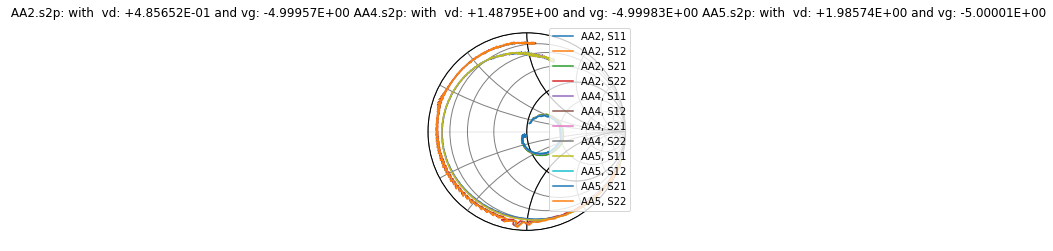

In [107]:
# plot_smith(files)

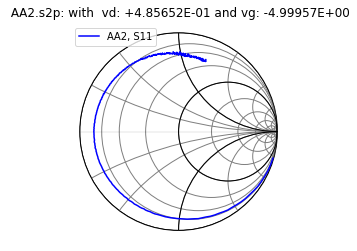

In [20]:
plot_s11(files)  

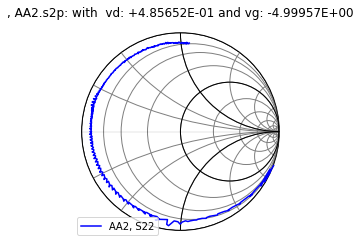

In [21]:
plot_s22(files) 

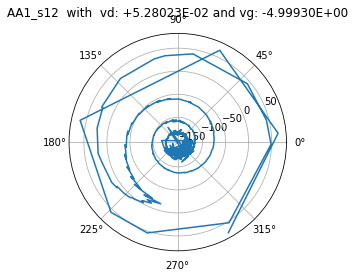

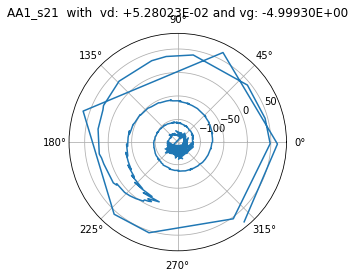

In [18]:
s12_phase, s21_phase = polar_plot(files)

In [19]:
print(s12_phase, s21_phase)

[71.45552827586259, 64.8115867176967, 65.24252223016485, 63.31066258683357, 56.52572881432531, 54.19294772563884, 53.715452616304916, 48.777446593867175, 44.39413872022003, 43.3624700544896, 40.43146093783179, 35.678667448108904, 33.818899176129726, 32.03014518677751, 28.05003833657809, 25.283586409537254, 23.865451890625305, 20.867678777923135, 17.803834704310294, 16.008634108159132, 14.183349360312139, 11.105675703398152, 9.159349720856886, 7.423224476842352, 5.147009968011445, 2.9316904879291754, 1.1621371070768762, -0.5422077628124281, -2.685494255533994, -4.4122547896554565, -5.99433940722942, -7.440230023499462, -9.615976103364739, -11.681553712537836, -12.343023689313322, -14.806827692233865, -17.724864525788057, -17.856061540819113, -20.04449209968848, -22.85249511526887, -22.54544529244663, -23.900616755973168, -26.67020367155224, -27.257327324714886, -27.691501155488787, -29.967191453064167, -31.360268579637236, -31.568317982844423, -33.04403135295663, -35.09592052872105, -35

In [23]:
def polar_plot_s(s2p_file):
#     for file in files:
    data_s2p = pd.read_table(s2p_file, sep=" ", header=None,  names=["Frequency ", "S11 real", "S11 imaginary", "S12 real", "S12 imaginary",  "S21 real", "S21 imaginary",  "S22 real", "S22 imaginary" ])
    data_s2p.drop(data_s2p.head(3).index,inplace=True)

    s2p_data_array = np.asarray(data_s2p)
    s2p_data_array = s2p_data_array.astype('float32')

    s12 = [None] * len(s2p_data_array)
    s12_mag = [None] * len(s2p_data_array)
    s12_phase = [None] * len(s2p_data_array)

    s21 = [None] * len(s2p_data_array)
    s21_mag = [None] * len(s2p_data_array)
    s21_phase = [None] * len(s2p_data_array)

    for i in range(len(s2p_data_array)):

        s12[i] = complex(s2p_data_array[i][3] , s2p_data_array[i][4])
        s12_mag[i] = abs(s12[i])
        s12_phase[i] = cmath.phase(s12[i])

        s21[i] = complex(s2p_data_array[i][5] , s2p_data_array[i][6])
        s21_mag[i] = abs(s21[i])
        s21_phase[i] = cmath.phase(s21[i])

#     head_tail = os.path.splitext(file)

#     s12_title = head_tail[0] #+ f'_s12  with  vd: {file[1]} and vg: {file[2]}'

#         s12_title = head_tail[0] + '_s12'
    rf.plotting.plot_polar(s12_mag, s12_phase, x_label=None, y_label=None, title='s12', show_legend=True)
    plt.show()
#         rf.plotting.save_all_figs(graphs_path, format=['png'])
#         plt.close()


#     s21_title = head_tail[0] #+ f'_s21  with  vd: {file[1]} and vg: {file[2]}'
#         s21_title = head_tail[0] + '_s21'
    rf.plotting.plot_polar(s21_mag, s21_phase, x_label=None, y_label=None, title='s21', show_legend=True)
    plt.show()
#         rf.plotting.save_all_figs(graphs_path, format=['png'])
#         plt.close()

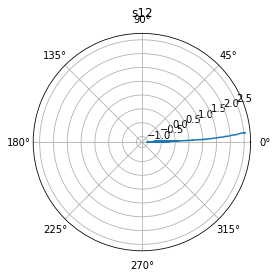

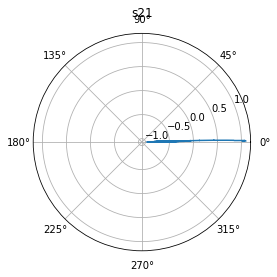

In [24]:
polar_plot_s('C:/Users/Dell/Desktop/EE work/s2p/SEI_VGQ0VDQ000_T25_s2p/EW1.s2p')